# MNIST text Digit Classification

### a) Load the data..........

In [27]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist = input_data.read_data_sets("MNIST_data/" , one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001BD16181F08>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001BD161878C8>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001BD161874C8>)

In [4]:
mnist.train.images.shape , mnist.train.labels.shape
## there are total 55000 flaten images and each images os of dimesion 28 x 28

((55000, 784), (55000, 10))

In [5]:
mnist.train.labels[0] ## labels are hot encoded

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [6]:
mnist.test.images.shape , mnist.test.labels.shape

((10000, 784), (10000, 10))

In [7]:
mnist.validation.images.shape

(5000, 784)

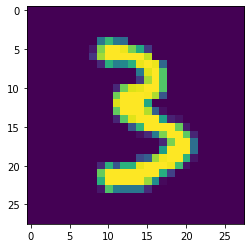

In [8]:
import numpy as np
from matplotlib import pyplot as plt
first_image = mnist.train.images[412]
first_image = np.array(first_image , dtype = 'float')
first_image = first_image.reshape((28 , 28))
plt.imshow(first_image)
plt.show()

In [9]:
## random_normal
with tf.Session() as sess:
    print(tf.random_normal([784 , 256]).eval())


[[ 1.163568    0.51946586  0.49945053 ... -0.4794342  -1.4662052
   1.0500387 ]
 [-1.1206828  -0.23789042 -1.6842514  ...  0.35870042  0.6935915
  -0.10781898]
 [ 0.817157   -0.8660302  -0.7321077  ...  1.1609097  -1.4961051
  -0.08683012]
 ...
 [ 1.2753392   1.3234016  -0.98227155 ...  0.17960775 -1.5963558
  -0.13026546]
 [ 0.6787441   0.63536936 -0.09550823 ...  0.95762986 -1.2170489
   1.0597452 ]
 [ 0.0149205   0.25319952  1.1475748  ... -0.5938021  -0.13805698
  -0.53822076]]


### b) Intialising weights and biases

In [10]:
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256
n_classes = 10

weights = {
    "h1" : tf.Variable(tf.random_normal([n_input , n_hidden_1]) ) ,
#     "h1" : tf.Variable(tf.random_normal([n_input , n_hidden_1]) , trainable = False) ,
    "h2" : tf.Variable(tf.random_normal([n_hidden_1 , n_hidden_2])) ,
    "out" : tf.Variable(tf.random_normal([n_hidden_2 , n_classes]))
}

biases = {
    "h1" : tf.Variable(tf.random_normal([n_hidden_1])) , 
    "h2" : tf.Variable(tf.random_normal([n_hidden_2])) , 
    "out" : tf.Variable(tf.random_normal([n_classes]))
}

In [11]:
tf.trainable_variables()

[<tf.Variable 'Variable:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_2:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_3:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_4:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_5:0' shape=(10,) dtype=float32_ref>]

### c) Forward Propagation

In [12]:
def forward_propagation(x , weights , biases):
    in_layer1 = tf.add(tf.matmul(x , weights["h1"]) , biases["h1"])
    out_layer1 = tf.nn.relu(in_layer1)
    
    in_layer2 = tf.add(tf.matmul(out_layer1 , weights["h2"]) , biases["h2"])
    out_layer2 = tf.nn.relu(in_layer2)
    
    output = tf.add(tf.matmul(out_layer2 , weights["out"]) , biases["out"])
    return output

### d) finding the prediction and accuracy

In [13]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
x = tf.placeholder("float" , [None , n_input])
y = tf.placeholder(tf.int32 , [None , n_classes])

In [14]:
## predicted output
pred = forward_propagation(x , weights , biases)
predictions = tf.argmax(pred , 1)
predictions_eval = sess.run(predictions , feed_dict = {x : mnist.test.images})
predictions_eval

array([5, 1, 5, ..., 1, 7, 1], dtype=int64)

In [15]:
## actual labels
true_labels = tf.argmax(y , 1)
labels = sess.run(true_labels , feed_dict = {y : mnist.test.labels})
labels

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [16]:
## correct prediction
correct_predictions = tf.equal(predictions , true_labels)

In [17]:
## other way to run simultanously
predictions_eval , labels , correct_pred = sess.run([predictions , true_labels , correct_predictions] , feed_dict = {x : mnist.test.images , y : mnist.test.labels})
predictions_eval , labels , correct_pred

(array([5, 1, 5, ..., 1, 7, 1], dtype=int64),
 array([7, 2, 1, ..., 4, 5, 6], dtype=int64),
 array([False, False, False, ..., False, False, False]))

In [18]:
## how many we are getting correct
correct_pred.sum()

1130

### e) cost function

In [19]:
## cross entropy function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred , labels = y))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [20]:
sess.run(cost , feed_dict = {x : mnist.train.images , y : mnist.train.labels})

1926.4436

### f) Running the optimizer

In [21]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/" , one_hot = True)

n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256
n_classes = 10

weights = {
    "h1" : tf.Variable(tf.random_normal([n_input , n_hidden_1]) ) ,
    "h2" : tf.Variable(tf.random_normal([n_hidden_1 , n_hidden_2])) ,
    "out" : tf.Variable(tf.random_normal([n_hidden_2 , n_classes]))
}

biases = {
    "h1" : tf.Variable(tf.random_normal([n_hidden_1])) , 
    "h2" : tf.Variable(tf.random_normal([n_hidden_2])) , 
    "out" : tf.Variable(tf.random_normal([n_classes]))
}

print(tf.trainable_variables())

def forward_propagation(x , weights , biases):
    in_layer1 = tf.add(tf.matmul(x , weights["h1"]) , biases["h1"])
    out_layer1 = tf.nn.relu(in_layer1)
    
    in_layer2 = tf.add(tf.matmul(out_layer1 , weights["h2"]) , biases["h2"])
    out_layer2 = tf.nn.relu(in_layer2)
    
    output = tf.add(tf.matmul(out_layer2 , weights["out"]) , biases["out"])
    return output

x = tf.placeholder("float" , [None , n_input])
y = tf.placeholder(tf.int32 , [None , n_classes])
pred = forward_propagation(x , weights , biases)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred , labels = y))

optimizer = tf.train.AdamOptimizer(learning_rate =  0.01)
optimize = optimizer.minimize(cost)

# minimize function ===>> finds the derivative(slope) values & chnage the values as per the learning rate
# and the slopes once
## if there is no variable which are trainable then this will give error 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
[<tf.Variable 'Variable:0' shape=(784, 256) dtype=float32_ref>, <tf.Variable 'Variable_1:0' shape=(256, 256) dtype=float32_ref>, <tf.Variable 'Variable_2:0' shape=(256, 10) dtype=float32_ref>, <tf.Variable 'Variable_3:0' shape=(256,) dtype=float32_ref>, <tf.Variable 'Variable_4:0' shape=(256,) dtype=float32_ref>, <tf.Variable 'Variable_5:0' shape=(10,) dtype=float32_ref>, <tf.Variable 'Variable_6:0' shape=(784, 256) dtype=float32_ref>, <tf.Variable 'Variable_7:0' shape=(256, 256) dtype=float32_ref>, <tf.Variable 'Variable_8:0' shape=(256, 10) dtype=float32_ref>, <tf.Variable 'Variable_9:0' shape=(256,) dtype=float32_ref>, <tf.Variable 'Variable_10:0' shape=(256,) dtype=float32_ref>, <tf.Variable 'Variable_11:0' shape=(10,) dtype=float32_ref>]


In [22]:
c, _ = sess.run([cost,optimize], feed_dict = {x:mnist.train.images , y:mnist.train.labels})
print(c)
## every time we run it it will reduce the cost

1909.2466


### g) How does the optimizer work ???

In [23]:
## first it will find which variables depends upon cost function and trainable = True
tf.trainable_variables()

[<tf.Variable 'Variable:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_2:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_3:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_4:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_5:0' shape=(10,) dtype=float32_ref>,
 <tf.Variable 'Variable_6:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_7:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_8:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_9:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_10:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_11:0' shape=(10,) dtype=float32_ref>]

### h) running multiple iteration

In [24]:
for i in range(25):
    c , _ = sess.run([cost , optimize] , feed_dict = {x : mnist.train.images , y : mnist.train.labels})
    print(c)

1287.4387
993.3718
823.77075
630.5597
498.0017
422.03894
324.6146
243.89357
206.42589
199.79597
201.87659
197.06476
181.93384
163.32506
147.52953
134.63579
122.8302
112.28021
104.36167
99.75114
97.71867
96.584465
94.556015
90.68125
85.33096


In [25]:
predictions = tf.argmax(pred , 1)
correct_labels = tf.argmax(y , 1)
correct_predictions = tf.equal(predictions , correct_labels)
predictions , correct_predictions = sess.run([predictions , correct_predictions] , feed_dict = {x : mnist.test.images , y : mnist.test.labels})

correct_predictions.sum()

8536

### i) Batch gradient descent

In [26]:
batch_size = 100
for i in range(25):
    num_batches = int(mnist.train.num_examples / batch_size)
    total_cost = 0
    for j in range(num_batches):
        batch_x , batch_y = mnist.train.next_batch(batch_size)
        c , _ = sess.run([cost ,optimize] , feed_dict = {x : batch_x , y : batch_y})
        total_cost += c
    print(total_cost)
    
predictions = tf.argmax(pred , 1)
correct_labels = tf.argmax(y , 1)
correct_predictions = tf.equal(predictions , correct_labels)
predictions , correct_predictions = sess.run([predictions , correct_predictions] , feed_dict = {x : mnist.test.images , y : mnist.test.labels})

correct_predictions.sum()

15119.32715946436
4481.572406394545
2514.48060637527
1768.2681618012111
1394.5199854758264
1207.4041570759744
987.7292077429545
968.7826518540512
860.862793349875
687.7702338644447
623.1387422478576
500.2224838250191
558.9333610557625
444.09650698323
477.2283421538824
348.8355734739182
316.13843687428215
349.650730526278
223.57271703032205
217.3286543977516
223.267177965108
242.6425401395077
186.42863172865722
178.1000442850375
154.8819588025214


9651